<a href="https://colab.research.google.com/github/Saniaaaadcbdt4/projects/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


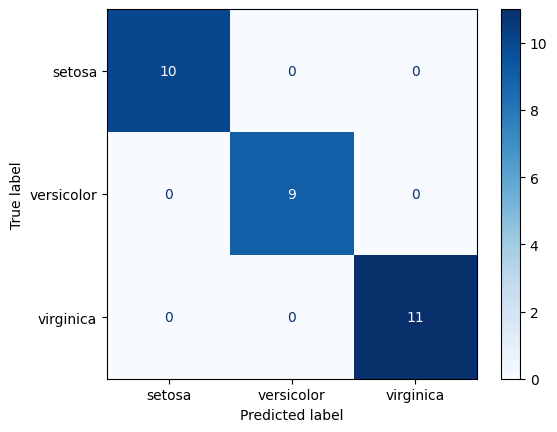

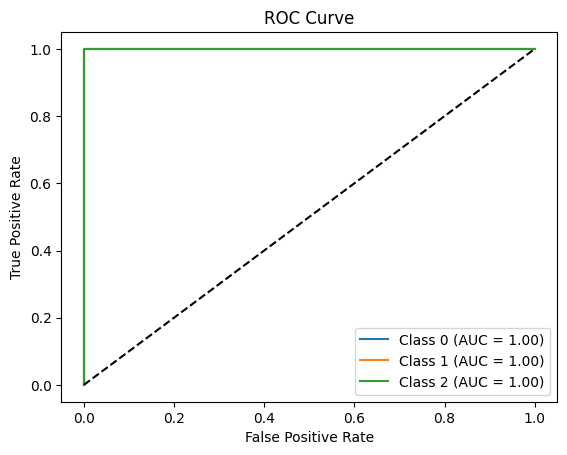

Mean Cross-Validation Accuracy: 0.9733333333333334
Standard Deviation of Cross-Validation Accuracy: 0.02494438257849294


In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# Load the dataset
from sklearn.datasets import load_iris
data = load_iris()
X, y = data.data, data.target

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train a logistic regression model with increased max_iter
# Change: Added max_iter=1000 to ensure convergence
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the calculated metrics
# Change: Added print statements for clarity
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=data.target_names)
disp.plot(cmap='Blues')
plt.show()

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i in range(len(data.target_names)):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, model.predict_proba(X_test)[:, i])
    roc_auc[i] = roc_auc_score(y_test == i, model.predict_proba(X_test)[:, i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(data.target_names)):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Perform k-fold cross-validation
k = 5
cv_scores = cross_val_score(model, X, y, cv=k)

# Calculate mean and standard deviation of the accuracy
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

# Print cross-validation results
# Change: Added print statements for clarity
print(f"Mean Cross-Validation Accuracy: {mean_cv_score}")
print(f"Standard Deviation of Cross-Validation Accuracy: {std_cv_score}")


# Accuracy Metrics Calculation
**Accuracy**: This represents the proportion of correctly classified instances.

**Precision**: This indicates the proportion of positive identifications that were actually correct.

**Recall**: This measures the proportion of actual positives that were identified correctly.

**F1-Score**: This is the harmonic mean of precision and recall, providing a single metric that balances both concerns.

#Confusion Matrix Interpretation
**Confusion Matrix**: This is a summary of prediction results on a classification problem. Each row of the matrix represents the instances in an actual class, while each column represents the instances in a predicted class. It helps identify where the model is making mistakes and the types of errors it is making.

# ROC/AUC Calculation
**ROC Curve**: The ROC curve is a graphical representation of the true positive rate (TPR) vs. the false positive rate (FPR) at various threshold settings.
**AUC**: The area under the ROC curve (AUC) quantifies the overall ability of the model to discriminate between positive and negative classes. Higher AUC values indicate better model performance.
# Cross-Validation Reporting
**Mean and Standard Deviation of Cross-Validation Accuracy**: The mean provides an estimate of the model's performance across different splits of the data, while the standard deviation indicates the variability of the model’s performance.
**Importance of Cross-Validation**: Cross-validation is crucial as it helps ensure that the model generalizes well to unseen data by evaluating its performance on multiple train-test splits, reducing the risk of overfitting.